In [1]:
import opacities as op
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
conductivity=op.conductivity("./../new_cons/Normal_silicates/")

<IPython.core.display.Javascript object>


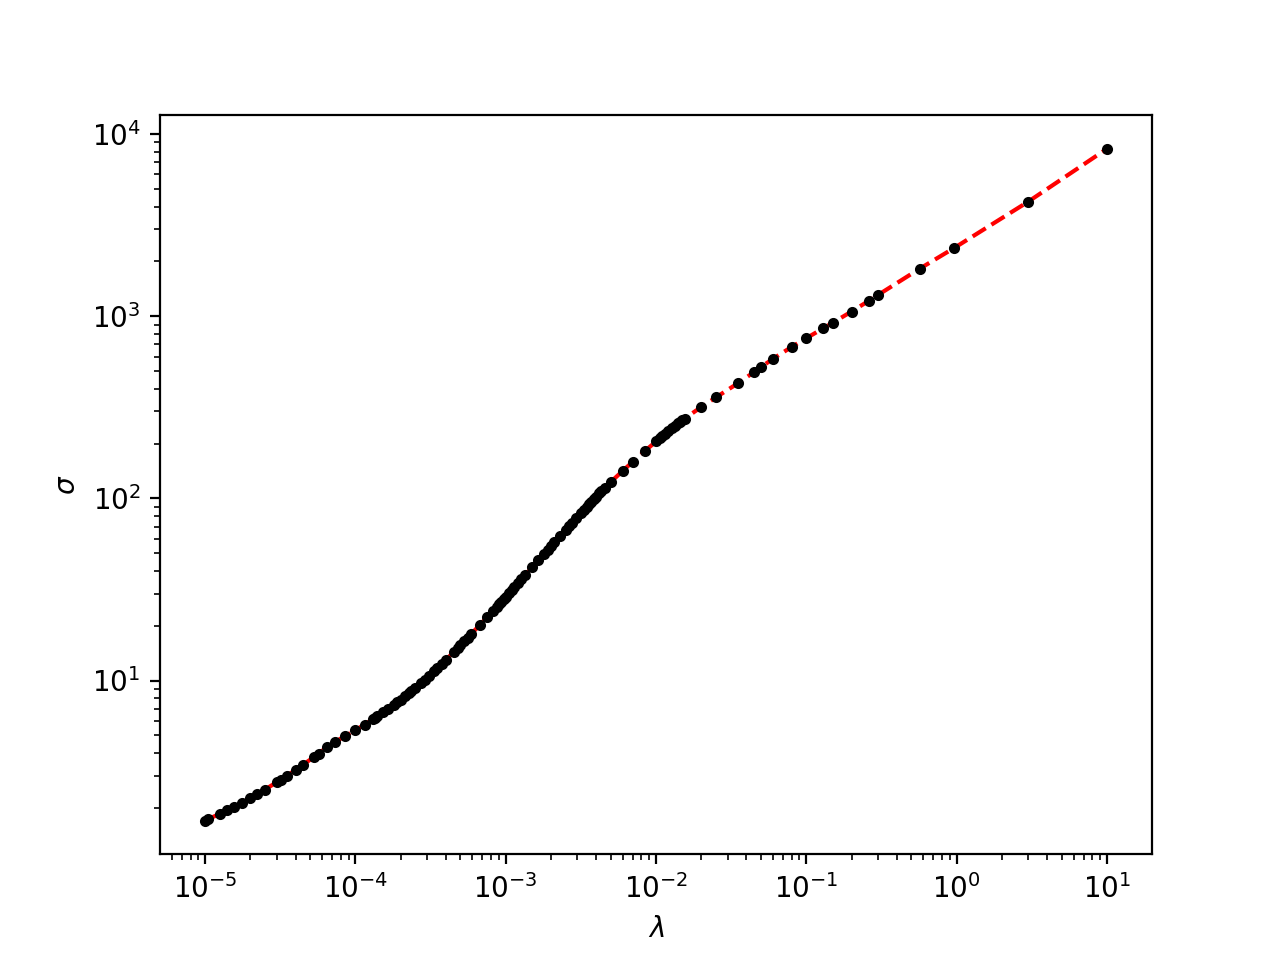

In [16]:
plt.figure()
plt.xlabel("$\lambda$")
plt.ylabel("$\sigma$")
plt.loglog(conductivity.lambdas,np.abs(conductivity.conductivities),'r--')
plt.loglog(conductivity.lambdas,np.abs(conductivity.conductivities),'k.')